In [1]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt

In [2]:
#Load the Dataset
data = pickle.load(open('labeled_data\\fully_connected_network.pkl', 'rb'))

In [3]:
# Creating the structure of the tasks
project = nx.Graph()
node_list = ["java", "cpp", "web"]
edge_list = [("java", "web"),("cpp", "web")]
project.add_nodes_from(node_list)
project.add_edges_from(edge_list)

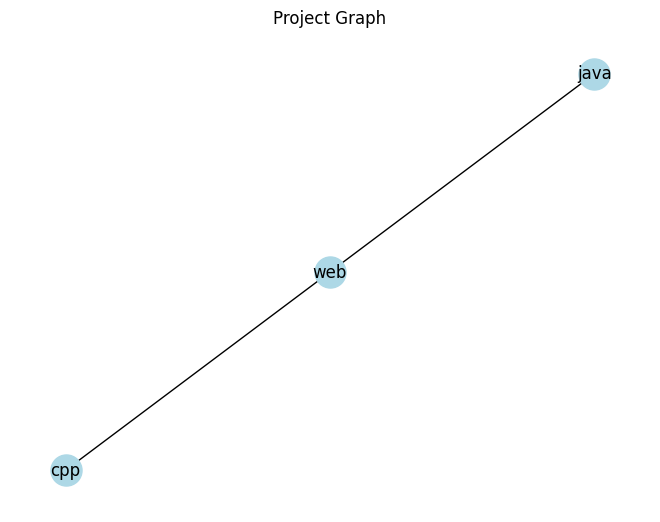

In [4]:
# Plot project network
nx.draw(project, with_labels=True, node_color='lightblue', node_size=500)
plt.title("Project Graph")
plt.axis('off')
plt.show()

In [5]:
# Initialize Sets for each Team
Team_java = set()
Team_cpp = set()
Team_web = set()

Task_Java_skills = set(['Mobile App Development', 'Android', 'iPhone', 'Java',
                       'Linux', 'System Admin', 'Flutter', 'HTML', 'Pine Script', 'eCommerce', 'Swift',
                        'Web Scraping', 'Flutter', 'ASP.NET', 'MySQL', 'API', 'Amazon Web Services',
                        'Android Studio', 'API Integration'])
Task_Cpp_skills = set(['C++ Programming', 'C Programming', 'C# Programming',
                      'Visual Basic', 'Software Architecture', 'PHP', 'Linux', 'JavaScript',
                       'Blockchain', 'API', 'Engineering', 'MySQL', '.NET', 'API Integration'])
Task_Web_skills = set(['SEO', 'Website Design', 'PHP', 'WordPress', 'HTML', 'Website Design',
                      'JavaScript', 'HTML5', 'PHP', 'JavaScript', 'React.js', 'Graphic Design',
                       'CSS', 'Logo Design', 'Photoshop', 'Illustrator', 'eCommerce', 'Prestashop',
                       'PSD to HTML''Content Marketing', 'API', 'Python', 'Web Hosting', 'PSD to HTML',
                       'Advertising', 'Shopify', 'App Developer', 'Django'])

Covered_Java_skills = set()
Covered_Cpp_skills = set()
Covered_Web_skills = set()

In [6]:
len(Task_Java_skills)

6

In [7]:
len(Task_Cpp_skills)

2

In [8]:
len(Task_Web_skills)

7

In [9]:
def compare_labels(G, u, v):
    """
        return True if u and v belong to the same team.
    """
    if G.nodes[u]['label'] == G.nodes[v]['label']:
        return True

In [10]:
def min_weight_neighbor(G,u,v):
    weight = G[u][v]['weight']
    if weight < min_weight:
        min_weight = weight
        min_weight_neighbor = v
    return min_weight , min_weight_neighbor

In [11]:
def assign_to_teams(G, u):
    if G.nodes[u]['label'] == 'java' and len(Covered_Java_skills.intersection(Task_Java_skills)) < len(Task_Java_skills) and len((Task_Java_skills-Covered_Java_skills).intersection(set(G.nodes[u]['skills']))) > 0:
        Team_java.add(u)
        Covered_Java_skills.add(set(G.nodes[u]['skills']))
        G.remove_node(u)
    elif G.nodes[u]['label'] == 'cpp' and len(Covered_Cpp_skills.intersection(Task_Cpp_skills)) < len(Task_Cpp_skills) and len((Task_Cpp_skills-Covered_Cpp_skills).intersection(set(G.nodes[u]['skills']))) > 0:
        Team_cpp.add(u)
        Covered_Cpp_skills.add(set(G.nodes[u]['skills']))
        G.remove_node(u)
    elif G.nodes[u]['label'] == 'web' and len(Covered_Web_skills.intersection(Task_Web_skills)) < len(Task_Web_skills) and len((Task_Web_skills-Covered_Web_skills).intersection(set(G.nodes[u]['skills']))) > 0:
        Team_web.add(u)
        Covered_Web_skills.add(set(G.nodes[u]['skills']))
        G.remove_node(u)

In [12]:
def team_assignment(G, P):
    graph = G.copy()
    for u in graph.nodes:
        try:
            neighbors = list(G.neighbors(u))
            min_weight_neighbor = None
            min_weight = float('inf')  # Initialize to positive infinity
            for v in neighbors:
                if not(compare_labels(G, u, v)) and (G.nodes[u]['label'], G.nodes[v]['label']) in P.edges:
                    weight = G[u][v]['weight']
                    if weight < min_weight:
                        min_weight = weight
                        min_weight_neighbor = v
            assign_to_teams(G, min_weight_neighbor)
            assign_to_teams(G, u)
        except:
            print("Node not found")


In [13]:
team_assignment(data, project)

Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not found
Node not f

In [14]:
len(Team_cpp)

224

In [15]:
len(Team_java)

110

In [16]:
len(Team_web)

1034